# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/human_body_temperature.csv')

# 1) Is the distribution of body temperatures normal?

(array([ 4.,  6., 15., 26., 30., 30., 15.,  1.,  2.,  1.]),
 array([ 96.3 ,  96.75,  97.2 ,  97.65,  98.1 ,  98.55,  99.  ,  99.45,
         99.9 , 100.35, 100.8 ]),
 <a list of 10 Patch objects>)

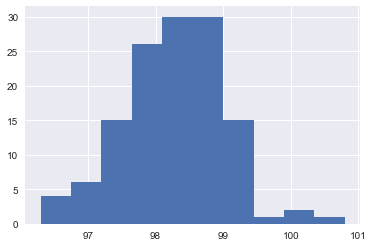

In [2]:
sns.set()
plt.hist(df['temperature'])

Here I just plot a histogram of all the temperatures but it doesn't seem to show us very much, so let's try to make it a little more clear by increasing the number of bins. 

In [3]:
nbins = int(np.sqrt(len(df['temperature'])))

(array([ 4.,  6., 11., 19., 29., 30., 20.,  8.,  1.,  1.,  1.]),
 array([ 96.3       ,  96.70909091,  97.11818182,  97.52727273,
         97.93636364,  98.34545455,  98.75454545,  99.16363636,
         99.57272727,  99.98181818, 100.39090909, 100.8       ]),
 <a list of 11 Patch objects>)

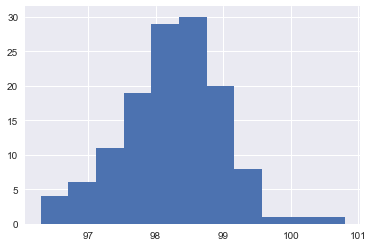

In [4]:
plt.hist(df['temperature'],bins=nbins) 

With more bins this looks significantly more like a standard distribution.

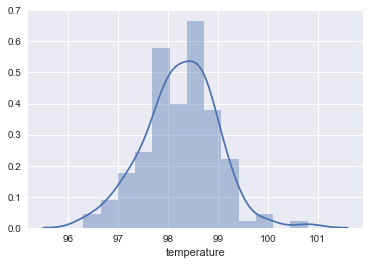

In [5]:
sns.distplot(df['temperature'])

In [6]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n=len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

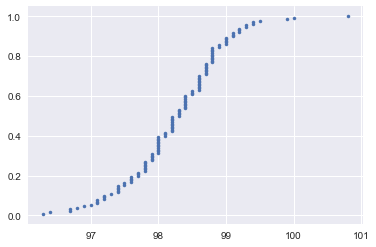

In [7]:
x,y=ecdf(df['temperature'])
plt.plot(x,y,marker='.',linestyle='none')

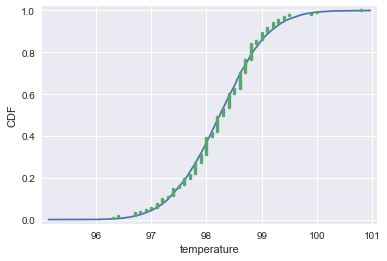

In [8]:
mu = np.mean(df['temperature'])
sigma = np.std(df['temperature'])
samples = np.random.normal(mu,sigma,size=10000)
x_theor,y_theor = ecdf(samples)
x,y = ecdf(df['temperature'])
_ =plt.plot(x_theor,y_theor)
_ = plt.plot(x,y,marker='.',linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('temperature')
_= plt.ylabel('CDF')
plt.show()

This is the Kolmogorov-Smirnov normality tests which compares the ECDF of the sample data with the distribution expected if it were normal. In the last graph, since they are basically rigth on top of one another, it is safe to assume that this is a normal distribution. 

# 2) Is the sample size large? Are the observations independent?

## Checking Sample Size

In [9]:
print(len(df['temperature']))

130


Large enough sample condition is usually n>= 30. 130 > 30 therefore should hold. 

## Testing for Observation Independence

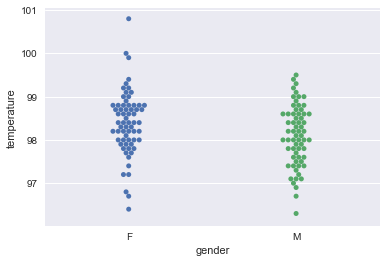

In [10]:
#Test first between gender and temperature with swarm plot, should be similar spread regardless of gender
sns.swarmplot(x='gender',y='temperature',data=df)

Next we want to test regression between heart rate and temperature. In order to do this,we must first normalize the data. The formula to normalize is y= (x - min)/(max-min). Should be independent observations if high heart rate and high temperature are independent of each other/ regression does not follow a trend line. 


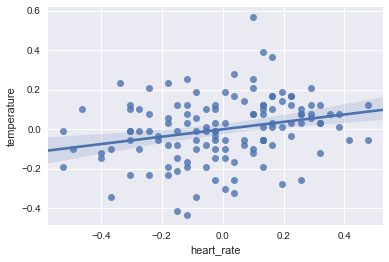

In [11]:
#normalize data
df_comb=df[['heart_rate','temperature']]
df_norm = (df_comb-df_comb.mean())/(df_comb.max()-df_comb.min())
sns.regplot(df_norm['heart_rate'],df_norm['temperature'])

As you can see the data does not follow the trend line, therefore it is safe to assume that the two variables of heart rate and temperature are independent.

# 3) Is the true population mean really 98.6 degrees F?
## First, trying bootstrap hypothesis test

For one sample bootstrap hypothesis test:<br/>
Null hypothesis: Mean is exactly 98.6 degrees Farenheit <br/>
Alternative hypothesis: Mean is not 98.6 degrees

In [12]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = func(np.random.choice(data, size=len(data)))

    return bs_replicates
#function for making bootstrap replicates

In [13]:
difference = np.array(df['temperature'] - 98.6)
bs_replicates = draw_bs_reps(difference,np.mean,size=10000)
p = np.sum(bs_replicates >= np.mean(df['temperature']))/10000
print('p= ',p)

p=  0.0


In [18]:
#now from frequentist 
from scipy import stats
#lets make this easy by using the 1 sample t-test included in scipy stats
t = stats.ttest_1samp(df.temperature, 98.6)[0]
p = stats.ttest_1samp(df.temperature, 98.6)[1]

print('t-statistic:', t)
print('p value:', p)

t-statistic: -5.4548232923645195
p-value: 2.4106320415561276e-07


We use one sample here since it is only compared to one. We use t instead of z since we don't know the standard deviation, and it will function similarly to z since we have a sufficiently large dataset.

In [16]:
#although z doesn't really work that well, we can approximate the standard error and use that to find the z score
stderror= np.std(df.temperature)/np.sqrt(len(df.temperature))
z = (np.mean(df.temperature) - 98.6) / stderror
p = stats.norm.cdf(z) * 2

# Print the values for z and p:
print('z-statistic:', z)
print('p value:', p)

z-statistic: -5.475925202078116
p-value: 4.3523151658821886e-08


Since the p value of all tests, both bootstrap and the two frequentist tests, is extremely small, you can conlcude that the null hypothesis that the mean population temperature is exactly 98.6 degrees can be rejected. 

# 4) Sample Size of 10

In [29]:
np.random.seed(42)

# Draw a random sample of 10 from the temperature data:
sample = np.random.choice(df.temperature, size=10)

#t tests with sample
t = stats.ttest_1samp(sample, 98.6)[0]
p = stats.ttest_1samp(sample, 98.6)[1]

print('t-statistic:', t)
print('p value:', p)


t-statistic: -3.0934479202257976
p-value: 0.012857704604809363


In [20]:
# Calculate z
z = (np.mean(sample) - 98.6) / (np.std(sample)/np.sqrt(len(sample)))

# Calculate  p-value:
p = stats.norm.cdf(z) * 2

# Print the values for z and p:
print('z-statistic:', z)
print('p-value:', p)

z-statistic: -3.260780417008125
p-value: 0.001111060453904971


The test statistic is outside the distribution corresponding to a 95% confidence level, but not 99.9%. Both tests allow you to reject the null hypothesis due to extremely low p-values but dependent on the confidence interval. The t distribution has more variability and is wider than z. 

# 5)Abnormal Temp

Confidence Interval Calculations:

In [21]:
df.temperature.mean()

98.24923076923078

In [24]:
#Using a 95% confidence interval
CI_low, CI_high = stats.norm.interval(0.95, loc=df.temperature.mean(), scale=df.temperature.std())
print(CI_low,CI_high)

96.81221818540311 99.68624335305844


This is the interval that falling outside of, would be considered abnormal. Using the 95% confidence interval and just the mean and standard dev will give us that range. Therefore an abnormal temperature would be <96.81 degrees or greater than 99.69.

In [41]:
error = (df.temperature.mean() - CI_low)
print(error)
#This is the margin of error 

1.4370125838276664


In [45]:
# Using the bootstrap method:
np.random.seed(85)
replicates = draw_bs_reps(df.temperature, np.mean, 10000)

# Compute the 95% confidence interval:
CI = np.percentile(replicates, [2.5, 97.5])
print('95% Confidence Interval:', CI)

95% Confidence Interval: [98.12615385 98.37386538]


Using the bootstrap method gives a much smaller range that even the expected mean falls out of. I don't believe that using the bootstrap method in this case is correct.

# 6) Difference in Male and Female

We use a two sample T-test here. We use two sample because we are in essence comparing two samples, the male and the female. We use the t-test due to not knowing the population standard deviation but simulating it using the mean of the two samples under the assumption of a reasonably large sample size. 

t-statistic:  -2.2854345381656103
p value:  0.02393188312239561
The null hypothesis can be rejected


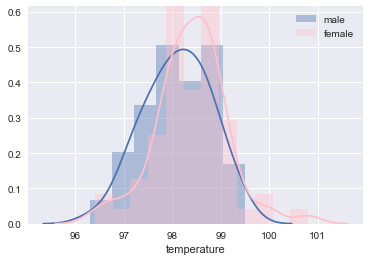

In [40]:
male_temp = df.temperature[df.gender == 'M']
female_temp = df.temperature[df.gender == 'F']

from scipy.stats import ttest_ind
t_val, p_val = ttest_ind(male_temp, female_temp)
print('t-statistic: ',t_val)
print('p value: ',p_val)

#lets think about this in terms of the test itself:
alpha = 0.05 #95% confidence
#The null hypothesis is there is no difference between the temperatures of male and females
if p_val < alpha:
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")


#let's plot to take a look
sns.distplot(male_temp, label='male')
sns.distplot(female_temp, label='female',color='pink')
plt.legend()

Therefore there seems to be a statistically significant difference between the running temperature of male and females. 

# Conclusion

Let's think back to the context of the original problem. It's been long expected that the true average temperature a human being should have is 98.6 degrees. Based on the data given to us, and running statistical tests, we were able to conclude that it's not that simple as declaring it to be. 

We had to double check using multiple methods that the data given to us was okay to use in our statistical assumptions. This was done by checking normality, mostly graphically using different plotting methods, a histogram, as well as a graph of the ECDF for the Kolmogorov-Smirnov normality test. We were able to conclude that in fact this distribution was normal.

The next was if the sample size was large enough and observations independence. We determined that the sample size was large enough to run the statistical tests, and we test independence by using a swarmplot as well as a regplot after normalization to test for independence and through those two graphical tests that the observations were in fact independent. 

Then we used a multitude of tests to determine whether the true population mean was at 98.6 degrees. We used both the frequentist and bootstrap methods, and used the t-statistic over the z since we did not know the population's standard deviation. Both the frequentist and the bootstrap method gave me p values that allowed us to reject the null hypothesis.

When using a sample size of 10, we used both t and z frequentist tests. The T statistic led us to reject at 95% confidence but not at 99.9% where as the z-statistic did, however the t interval was wider and more variable than the z. 

For calculating what is considered an abnormal temperature, I found the best thing to do was calculate based on a confidence interval and anything outside of that confidence interval would be considered abnormal. When using other tests we got intervals that seemed too narrow, so using a relatively wide confidence interval would most likely give us the best results, leaving us with a healthy nearly 3 degree wide range of what normal temperatures would be, and anything outside that interval would be considered an abnormal temperature. 

Last but not least, we wanted to see if there was in fact a true difference in the mean temperature of men and women. Using the gender of the people that we were given in the data, and a two sample t-test, once again, T due to not having true population standard deviation, we were able to determine that the null hypothesis could in fact be rejected, with the null hypothesis in that specific problem being that there is no statistically significant difference between the temperatures of men and women. 

Perhaps, the old accepted value of what the human mean temperature is supposed to look like needs to be reevaluated using some of these statistical methods and new acceptable standards between men and women can be established.